Este notebook foi executado pelo Google Colaboratory. Para executá-lo, clone o repositório para um diretório em seu Google Drive, conecte o notebook com o drive `drive.mount('/content/drive')` e localize o repositório já clonado `%cd /content/drive/.../PAC/cnn`.

# Localizando repositório

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Github/PAC

/content/drive/MyDrive/Github/PAC


# Inicializando

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import binary_crossentropy
from tensorflow.keras.losses import BinaryCrossentropy
from src.metrics import *
from src.data import load_dataset
from src.segmentation import UNet
from src.visualize import set_custom_style, plot_training
set_custom_style()

In [ ]:
%%time
dataset = load_dataset(grayscale=True, augmentation=True, norm=True)

CPU times: user 2.53 s, sys: 524 ms, total: 3.05 s
Wall time: 40.3 s


# Treinamento

In [ ]:
unet = UNet('unet-binary_crossentropy-16_32_64', dataset).build((16, 32, 64))
unet.compile(
    optimizer= tf.keras.optimizers.Adam(),
    loss= BinaryCrossentropy(),
    metrics= [DSC, IoU, area_mape]
)

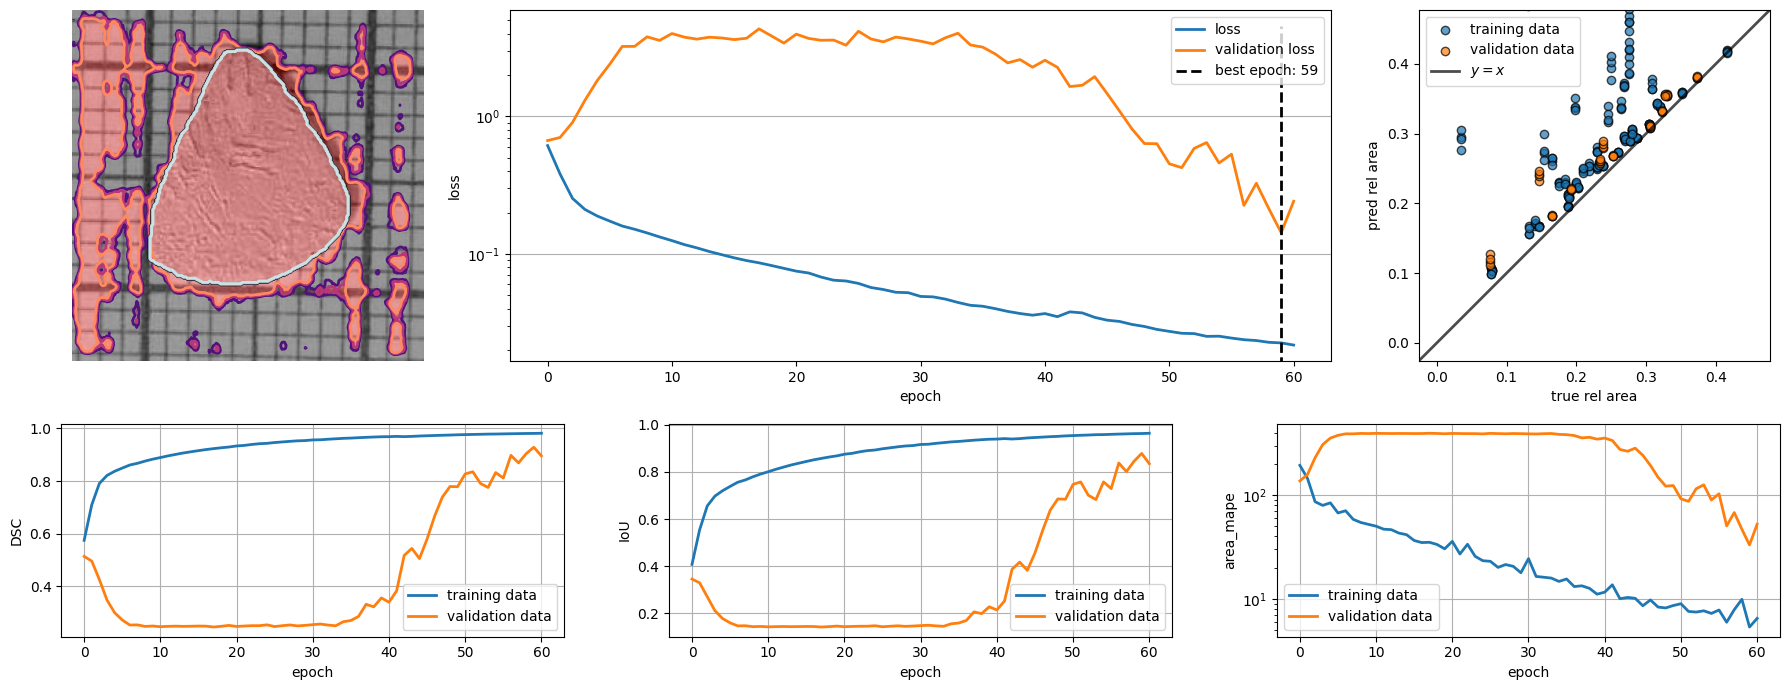

,epoch,DSC,IoU,area_mape,loss,val_DSC,val_IoU,val_area_mape,val_loss
59,59,0.981136,0.962973,5.378769,0.022555,0.928528,0.878458,33.165024,0.142817
58,58,0.980874,0.962473,9.941673,0.022782,0.903990,0.845346,46.911133,0.213851
56,56,0.979901,0.960597,5.982384,0.023799,0.897659,0.837844,50.558861,0.225453
60,60,0.981733,0.964128,6.512341,0.021758,0.895558,0.835012,52.500015,0.241823
57,57,0.980391,0.961541,7.901093,0.023463,0.868986,0.801362,67.920387,0.326819
51,51,0.977272,0.955560,7.598852,0.026501,0.835179,0.757521,87.043716,0.424466
54,54,0.978781,0.958450,7.274033,0.025240,0.832159,0.757733,89.807777,0.459054
50,50,0.976581,0.954240,9.013032,0.027361,0.827113,0.747190,92.199684,0.452777
55,55,0.979383,0.959603,7.838703,0.024459,0.811305,0.729186,102.895523,0.531771
52,52,0.977828,0.956624,7.494099,0.026354,0.790874,0.701065,115.089539,0.586083


7/7 [==============================] - 184s 27s/step - loss: 0.0218 - DSC: 0.9817 - IoU: 0.9641 - area_mape: 6.5123 - val_loss: 0.2418 - val_DSC: 0.8956 - val_IoU: 0.8350 - val_area_mape: 52.5000
Epoch 62/1000
7/7 [==============================] - 131s 18s/step - loss: 0.0213 - DSC: 0.9821 - IoU: 0.9648 - area_mape: 5.2272 - val_loss: 0.1027 - val_DSC: 0.9455 - val_IoU: 0.9022 - val_area_mape: 23.4119
Epoch 63/1000
7/7 [==============================] - 133s 19s/step - loss: 0.0208 - DSC: 0.9826 - IoU: 0.9659 - area_mape: 7.7434 - val_loss: 0.1771 - val_DSC: 0.9209 - val_IoU: 0.8681 - val_area_mape: 38.2528
Epoch 64/1000
7/7 [==============================] - 129s 18s/step - loss: 0.0210 - DSC: 0.9828 - IoU: 0.9661 - area_mape: 4.7738 - val_loss: 0.0646 - val_DSC: 0.9635 - val_IoU: 0.9317 - val_area_mape: 14.2482
Epoch 65/1000
7/7 [==============================] - 132s 19s/step - loss: 0.0202 - DSC: 0.9833 - IoU: 0.9672 - area_mape: 4.9556 - val_loss: 0.0561 - val_DSC: 0.9673 - val_I

In [ ]:
history = unet.fit(1000, unet.x_train.shape[0]//6, plot=True, period=20, ranking=10)

# Contunuando treinamento

In [ ]:
unet = UNet('unet-binary_crossentropy-16_32_64-ii', dataset).load(compile=False)
unet.compile(
    optimizer= tf.keras.optimizers.Adam(),
    loss= BinaryCrossentropy(),
    metrics= [DSC, IoU, area_mape]
)

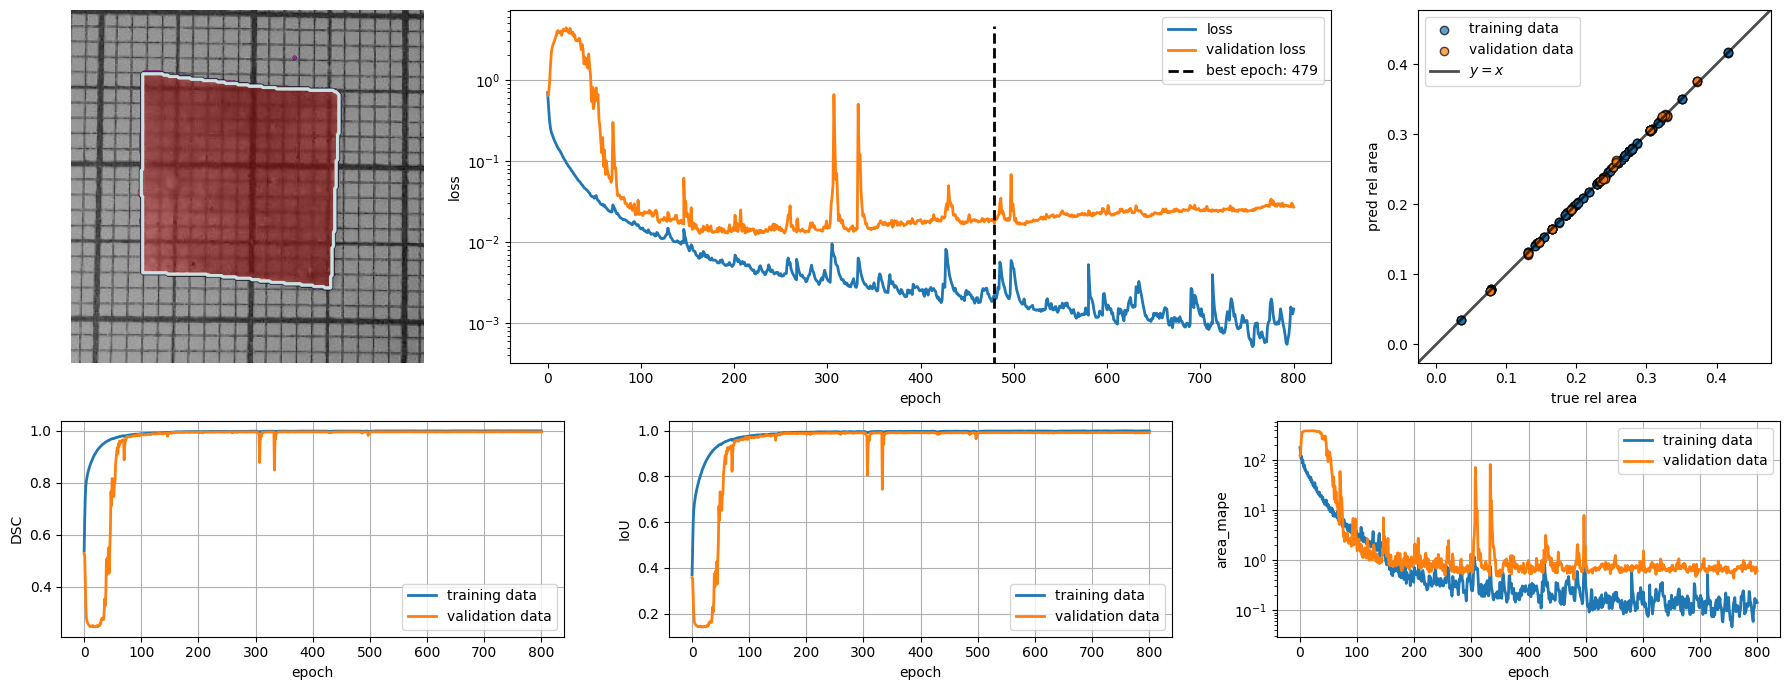

,epoch,DSC,IoU,area_mape,loss,val_DSC,val_IoU,val_area_mape,val_loss
481,479,0.998651,0.997305,0.202388,0.002210,0.995662,0.991368,0.418916,0.016965
763,759,0.999401,0.998804,0.144490,0.000996,0.995671,0.991386,0.440046,0.024867
696,693,0.999065,0.998133,0.178087,0.001550,0.995433,0.990916,0.474678,0.025702
353,351,0.998286,0.996579,0.239192,0.002723,0.995396,0.990841,0.482050,0.014599
349,347,0.998261,0.996528,0.228498,0.002767,0.995398,0.990844,0.482934,0.014200
350,348,0.998309,0.996623,0.174721,0.002650,0.995287,0.990626,0.483119,0.014860
346,344,0.998282,0.996570,0.225415,0.002677,0.995247,0.990546,0.490690,0.014566
334,332,0.998130,0.996267,0.537931,0.003048,0.995236,0.990525,0.498809,0.014551
255,254,0.997528,0.995069,0.441000,0.004082,0.995168,0.990387,0.500432,0.012895
695,692,0.998999,0.998001,0.189542,0.001745,0.995400,0.990851,0.511660,0.026569


7/7 [==============================] - 178s 26s/step - loss: 0.0015 - DSC: 0.9992 - IoU: 0.9984 - area_mape: 0.1438 - val_loss: 0.0270 - val_DSC: 0.9956 - val_IoU: 0.9912 - val_area_mape: 0.6206
Epoch 802/1713
7/7 [==============================] - 135s 19s/step - loss: 0.0012 - DSC: 0.9993 - IoU: 0.9986 - area_mape: 0.1093 - val_loss: 0.0277 - val_DSC: 0.9954 - val_IoU: 0.9908 - val_area_mape: 0.7059
Epoch 803/1713
7/7 [==============================] - 142s 20s/step - loss: 9.5519e-04 - DSC: 0.9994 - IoU: 0.9988 - area_mape: 0.0912 - val_loss: 0.0274 - val_DSC: 0.9954 - val_IoU: 0.9909 - val_area_mape: 0.6793
Epoch 804/1713
7/7 [==============================] - 132s 19s/step - loss: 8.6888e-04 - DSC: 0.9994 - IoU: 0.9988 - area_mape: 0.0962 - val_loss: 0.0278 - val_DSC: 0.9954 - val_IoU: 0.9908 - val_area_mape: 0.6554
Epoch 805/1713
7/7 [==============================] - 132s 18s/step - loss: 0.0010 - DSC: 0.9994 - IoU: 0.9987 - area_mape: 0.1467 - val_loss: 0.0252 - val_DSC: 0.9957

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-f913d42d678e>", line 1, in <cell line: 1>
    history = unet.fit(1000, unet.x_train.shape[0]//6, plot=True, period=20, ranking=10)
  File "/content/drive/MyDrive/Github/PAC/src/segmentation.py", line 175, in fit
    return self.model.fit(
  File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/lib/io/file_io.py", line 221, in flush
    self._writable_file.flush()
tensorflow.python.framework.errors_impl.FailedPreconditionError: models/unet-binary_crossentropy-16_32_64-ii/logs.csv; Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent

In [ ]:
history = unet.fit(1000, unet.x_train.shape[0]//6, plot=True, period=20, ranking=10)